In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

In [3]:
# preview train data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Note: there is no target variable in the test data (that is. "Survived" column is missing), so the goal is to predict this target using different machine learning algorithms such as logistic regression.

In [5]:
#drop unwanted columns
train_df = train_df.drop(['PassengerId','Name','Cabin','Ticket','SibSp','Parch','Embarked'],axis=1)
test_df = test_df.drop(['PassengerId','Name','Cabin','Ticket','SibSp','Parch','Embarked'],axis=1)

In [6]:
train_df.shape

(891, 5)

In [7]:
test_df.shape

(418, 4)

In [8]:
# check missing values in train data
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

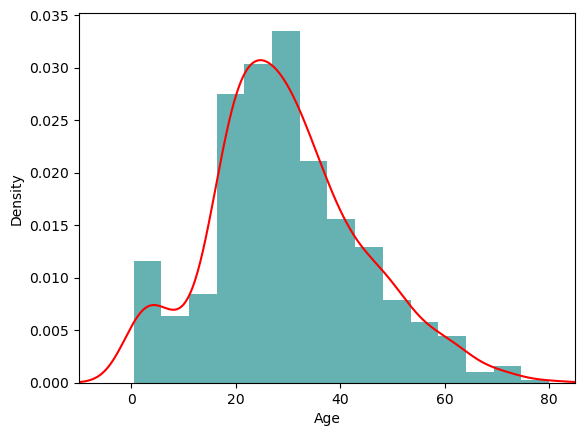

In [9]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [10]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean()))

# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median()))

The mean of "Age" is 29.70
The median of "Age" is 28.00


3    491
1    216
2    184
Name: Pclass, dtype: int64


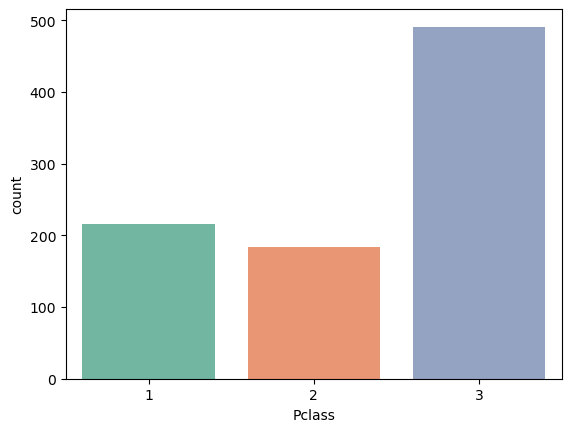

In [11]:
#Passenger class
print(train_df['Pclass'].value_counts())
sns.countplot(x='Pclass', data=train_df, palette='Set2')
plt.show()

#sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
#plt.show()

0    549
1    342
Name: Survived, dtype: int64


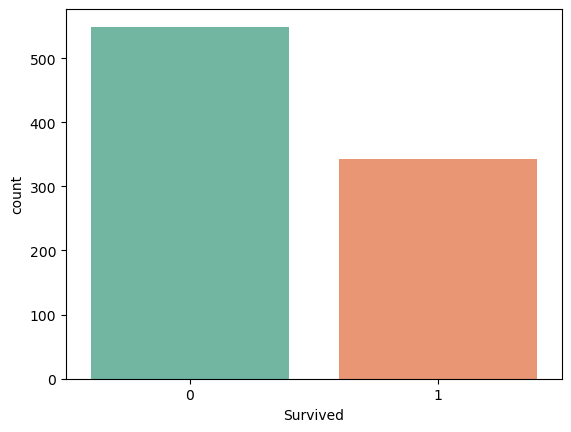

In [12]:
#Survival 
print(train_df['Survived'].value_counts())
sns.countplot(x='Survived', data=train_df, palette='Set2')
plt.show()

male      577
female    314
Name: Sex, dtype: int64


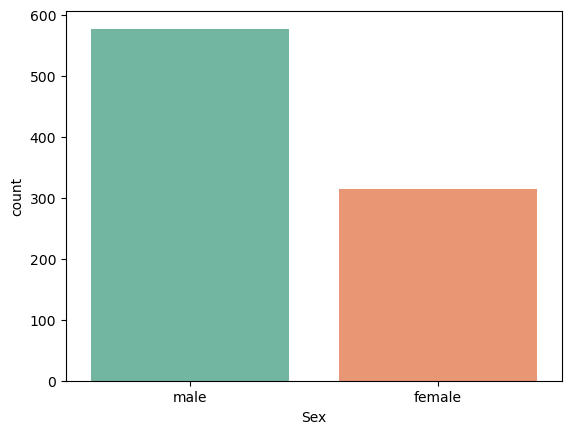

In [13]:
#Sex of passengers that boarded the ship 
print(train_df['Sex'].value_counts())
sns.countplot(x='Sex', data=train_df, palette='Set2')
plt.show()

In [14]:
#use median of age = 28 to fill all missing ages
train_df["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)


In [15]:
# check missing values in train data
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

# Categorical Values

Change the sex values to categorical values. Take Male = 1 and Female = 0

In [16]:
train_df['Sex'] =  train_df['Sex'].replace(['male', 'female'], [1, 0])

In [17]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


# Splitting Into Inputs and Labels

In [18]:
Y = train_df['Survived']
X = train_df.drop('Survived', axis = 1)

In [19]:
Y.shape

(891,)

In [20]:
X.shape

(891, 4)

# Logistic Regression

## Unbalanced Target Variable

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [22]:
model.score(X,Y)

0.7991021324354658

Using Test Dataset

In [23]:
test_df.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [24]:
test_df['Sex'] =  test_df['Sex'].replace(['male', 'female'], [1, 0])

In [25]:
test_df.head()

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875


In [26]:
test_df.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [27]:
#use median of age to fill all missing ages
test_df["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)

#use median of Fare to fill all missing ages
test_df["Fare"].fillna(test_df["Fare"].median(skipna=True), inplace=True)

In [28]:
prediction = model.predict(test_df)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Summarize the fit model

In [29]:
sample = test_df.copy()
sample['Survived'] = prediction

sample.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,34.5,7.8292,0
1,3,0,47.0,7.0000,0
2,2,1,62.0,9.6875,0
3,3,1,27.0,8.6625,0
4,3,0,22.0,12.2875,1


## Balancing the Target Variable

In [30]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object with desired options
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the target variable Y
X_train, Y_train = smote.fit_resample(X, Y)


In [31]:
#Survived Column after balancing the target value
print(Y_train.value_counts())


0    549
1    549
Name: Survived, dtype: int64


In [32]:
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [33]:
model1.score(X_train,Y_train)

0.8169398907103825

In [34]:
#Summarize the fit model

prediction1 = model1.predict(test_df)
prediction1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [35]:
sample1 = test_df.copy()
sample1['Survived'] = prediction1

sample1.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,34.5,7.8292,0
1,3,0,47.0,7.0000,0
2,2,1,62.0,9.6875,0
3,3,1,27.0,8.6625,0
4,3,0,22.0,12.2875,1


# Naive Bayes Classifier

In [36]:
#Unbalanced dataset

from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(X,Y)

GaussianNB()

In [37]:
model2.score(X,Y)

0.7777777777777778

In [38]:
#Balanced dataset

model3 = GaussianNB()
model3.fit(X_train,Y_train)

GaussianNB()

In [39]:
model3.score(X_train,Y_train)

0.7969034608378871

Variants of Naive Bayes in Scikit Learn
Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under scikit learn library:

Gausiaan: It is used in classification and it assumes that features follow a normal distribution.

Multinomial:It is used for discrete counts. For example, let’s say, we have a text classification problem. We have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones).

## Multinomial Naive Bayes

In [40]:
#Unbalanced dataset

from sklearn.naive_bayes import MultinomialNB

model4 = MultinomialNB()
model4.fit(X,Y)

MultinomialNB()

In [41]:
model4.score(X,Y)

0.6891133557800224

In [42]:
#Balanced dataset

model5 = GaussianNB()
model5.fit(X_train,Y_train)

GaussianNB()

In [43]:
model5.score(X_train,Y_train)

0.7969034608378871

## Bernoulli Naive Bayes

In [44]:
#Unbalanced dataset

from sklearn.naive_bayes import BernoulliNB

model6 = BernoulliNB()
model6.fit(X,Y)

BernoulliNB()

In [45]:
model6.score(X,Y)

0.7867564534231201

In [46]:
#Balanced dataset

model7 = BernoulliNB()
model7.fit(X_train,Y_train)

BernoulliNB()

In [47]:
model7.score(X_train,Y_train)

0.8032786885245902

# Random Forest Classifier

In [48]:
#Unbalanced dataset

from sklearn.ensemble import RandomForestClassifier

model8 = RandomForestClassifier()
model8.fit(X,Y)

RandomForestClassifier()

In [49]:
model8.score(X,Y)

0.9775533108866442

In [50]:
#Balanced dataset

model9 = RandomForestClassifier()
model9.fit(X_train,Y_train)

RandomForestClassifier()

In [51]:
model9.score(X_train,Y_train)

0.9817850637522769

## Decision Tree Classifier

In [52]:
#Unbalanced dataset

from sklearn.tree import DecisionTreeClassifier

model10 = DecisionTreeClassifier(criterion="entropy",max_depth=2)
model10.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [53]:
model10.score(X,Y)

0.7867564534231201

In [54]:
#Balanced dataset

model11 = DecisionTreeClassifier(criterion="entropy",max_depth=2)
model11.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [55]:
model11.score(X_train,Y_train)

0.8142076502732241

## Support Vector Machine

In [56]:
#Unbalanced dataset

from sklearn import svm

model12 = svm.SVC(kernel='linear', C=0.1)
model12.fit(X,Y)

SVC(C=0.1, kernel='linear')

In [57]:
model12.score(X,Y)

0.7867564534231201

In [58]:
#Balanced dataset

model13 = svm.SVC(kernel='linear', C=0.1)
model13.fit(X_train,Y_train)

SVC(C=0.1, kernel='linear')

In [59]:
model13.score(X_train,Y_train)

0.8032786885245902

## k-nearest neighbor (KNN)

In [60]:
#Unbalanced dataset

from sklearn.neighbors import KNeighborsClassifier

model14 = KNeighborsClassifier(n_neighbors=3)
model14.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [61]:
model14.score(X,Y)

0.8406285072951739

In [62]:
#Balanced dataset

model15 = KNeighborsClassifier(n_neighbors=3)
model15.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
model15.score(X_train,Y_train)

0.8806921675774135

# PyCaret

In [66]:
!pip install pycaret shap

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/d5/54/d575af389203fc27d6c6cf7d60c4e67fcabfda4bc8e84271c8a396bd4a03/pycaret-3.1.0-py3-none-any.whl.metadata
  Using cached pycaret-3.1.0-py3-none-any.whl.metadata (16 kB)
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/9c/c6/2190e240140f582007b36b256e7b015572c5644055e6e1f80d917c74a9ff/shap-0.43.0-cp310-cp310-win_amd64.whl.metadata
  Using cached shap-0.43.0-cp310-cp310-win_amd64.whl.metadata (24 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-1.1.1-py3-none-any.whl
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
pip install pycaret[full]

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pycaret[full] in c:\users\money farmer\anaconda3\lib\site-packages (3.1.0)
  Obtaining dependency information for interpret>=0.2.7 from https://files.pythonhosted.org/packages/06/71/f765ef06a6e2e7c3705ffd4995bd2ddd9946a79abe69ea396384e37b7ad2/interpret-0.4.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/90.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/90.8 kB ? eta -:--:--
     ------------ ------------------------- 30.7/90.8 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------- 30.7/90.8 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------- 30.7/90.8 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------- 30.7/90.8 kB 435.7 kB/s eta 0:00:01
     ----------------- -------------------- 41.0/90.8 kB 115.5 kB/s eta 0:00:01
     ------------------------- ------------ 61.4/90.8 kB 156.1 kB/s eta 0:

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Money Farmer\\anaconda3\\Lib\\site-packages\\~yarrow\\arrow.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ --------------------- 7.9/17.0 MB 83.6 kB/s eta 0:01:49
     ------------------ ---------------

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [67]:
from pycaret.classification import *

In [69]:
#define variable to contain categorical features

cat_features = ["Pclass", "Sex"]

In [83]:
experiment = setup(train_df, target = "Survived", session_id = 123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 5)"
4,Transformed data shape,"(891, 5)"
5,Transformed train set shape,"(623, 5)"
6,Transformed test set shape,"(268, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [84]:
best = compare_models()

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [85]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [86]:
pred = predict_model(best)

AttributeError: 'list' object has no attribute 'predict'